<a href="https://colab.research.google.com/github/Fallennnnnn/A-Z-Uppercase-Handwriting-Recognition/blob/main/Handwriting_Recognition_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwriting Recognition Models using A-Z Uppercase Handwritten Alphabets**

# Importing Library

In [1]:
#Import Drive Library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Necessary Library
import pandas as pd
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# Loading And Visualize The Data

In [3]:
#Load The A-Z Handwritten Dataset
csv_file = '/content/drive/MyDrive/capstone/A_Z Handwritten Data.csv'
data = pd.read_csv(csv_file)

In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [5]:
#Mapping the label and rename label column
alphabets = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
                     10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
                     20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

data.iloc[:, 0] = data.iloc[:, 0].map(alphabets)
data.rename(columns = {'0':'label'}, inplace = True)

In [6]:
print(data)

       label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0          A    0    0    0    0    0    0    0    0    0  ...      0      0   
1          A    0    0    0    0    0    0    0    0    0  ...      0      0   
2          A    0    0    0    0    0    0    0    0    0  ...      0      0   
3          A    0    0    0    0    0    0    0    0    0  ...      0      0   
4          A    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
372446     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
372447     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
372448     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
372449     Z    0    0    0    0    0    0    0    0    0  ...      0      0   

        0.641  0.642  0.643  0.644  0.6

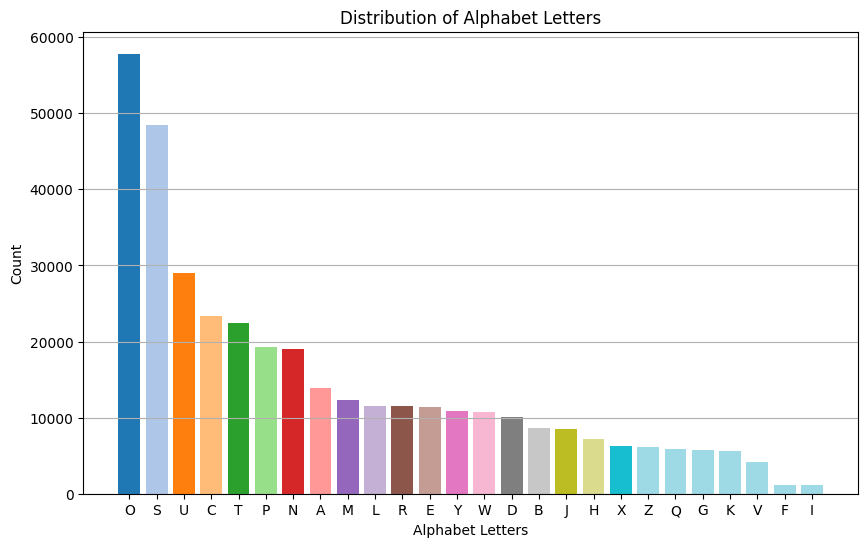

In [7]:
#Visualize the distribution of Alphabet Letters
name = data['label'].value_counts().keys()
values = data['label'].value_counts()

colors = plt.cm.tab20(range(26))

plt.figure(figsize=(10, 6))
plt.bar(name, values, color=colors)

plt.title("Distribution of Alphabet Letters")
plt.xlabel("Alphabet Letters")
plt.ylabel("Count")
plt.xticks()
plt.grid(axis='y')

plt.show()

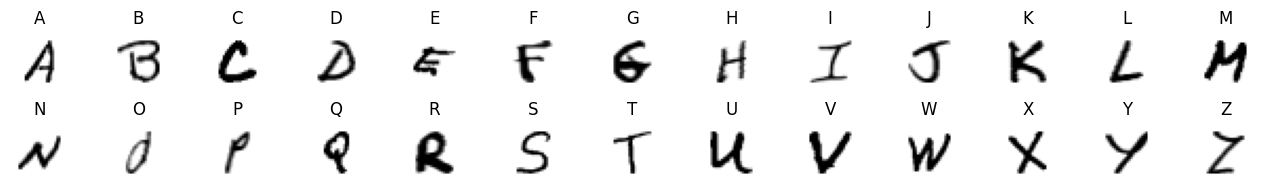

In [8]:
#Visualize the sample of Alphabet Letters
image_samples = []
labels = data['label'].unique()
for label in labels:

    sample_row = data[data['label'] == label].sample(n=1, random_state=100)
    image_data = sample_row.iloc[:, 1:].values.reshape(28, 28)
    image_samples.append(image_data)

fig, axs = plt.subplots(2, 13, figsize=(13, 2))

for i, ax in enumerate(axs.flat):
    ax.imshow(image_samples[i], cmap='binary')
    ax.axis('off')
    ax.set_title(chr(ord('A') + i))

plt.tight_layout()
plt.show()

# Handling With Imbalanced Dataset

In [9]:
# Grouping Imbalanced Alphabet Letters Distribution
groups = data.groupby('label')

splitted_data = pd.DataFrame()

for _, group in groups:
    sampled_group = group.sample(n=3000, replace=True, random_state=100)
    splitted_data  = pd.concat([splitted_data , sampled_group])

splitted_data = splitted_data.reset_index(drop=True)

print(splitted_data['label'].value_counts())

A    3000
B    3000
Y    3000
X    3000
W    3000
V    3000
U    3000
T    3000
S    3000
R    3000
Q    3000
P    3000
O    3000
N    3000
M    3000
L    3000
K    3000
J    3000
I    3000
H    3000
G    3000
F    3000
E    3000
D    3000
C    3000
Z    3000
Name: label, dtype: int64


In [10]:
print(splitted_data)

      label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0         A    0    0    0    0    0    0    0    0    0  ...      0      0   
1         A    0    0    0    0    0    0    0    0    0  ...      0      0   
2         A    0    0    0    0    0    0    0    0    0  ...      0      0   
3         A    0    0    0    0    0    0    0    0    0  ...      0      0   
4         A    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
77995     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
77996     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
77997     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
77998     Z    0    0    0    0    0    0    0    0    0  ...      0      0   
77999     Z    0    0    0    0    0    0    0    0    0  ...      0      0   

       0.641  0.642  0.643  0.644  0.645  0.646  0.

In [25]:
# Assuming you have a DataFrame called "new_dataframe"
splitted_data.to_csv('splitted_data.csv', index=False)

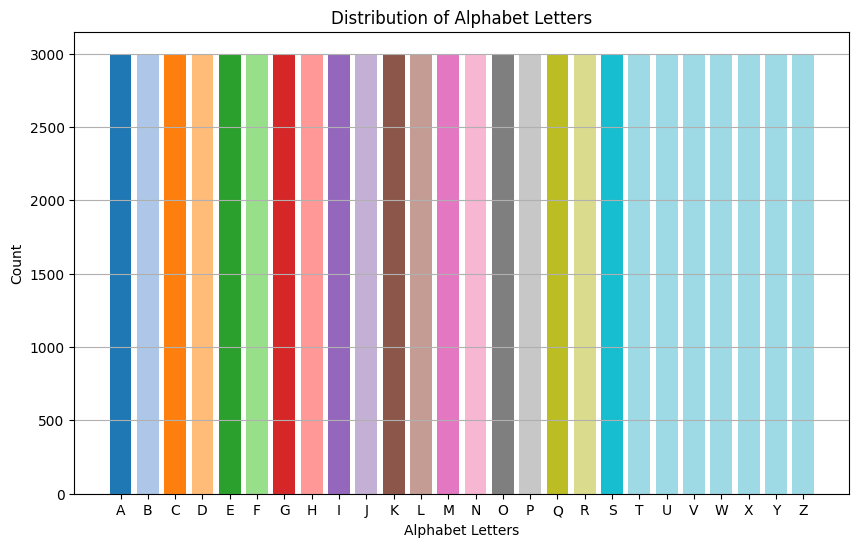

In [11]:
# Define a color map with 26 distinct colors
colors = plt.cm.tab20(range(26))
alphabet = sorted(splitted_data['label'].value_counts().keys())
counts = splitted_data['label'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(alphabet, counts, color=colors)

# Customize the plot
plt.title("Distribution of Alphabet Letters")
plt.xlabel("Alphabet Letters")
plt.ylabel("Count")
plt.xticks()
plt.grid(axis='y')

# Show the plot
plt.show()

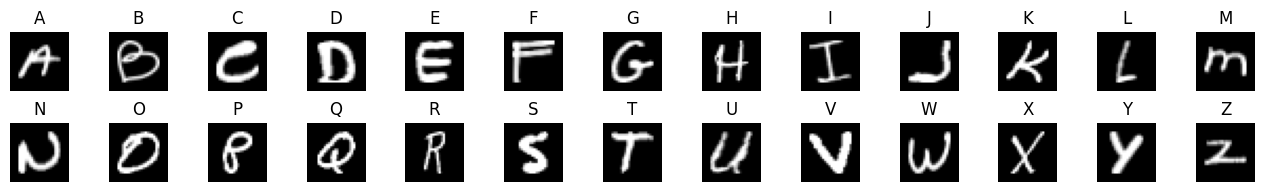

In [30]:
# Visualize a Sample of Alphabet Letters in Dataset
image_samples = []
labels = splitted_data['label'].unique()
for label in labels:

    sample_row = splitted_data[splitted_data['label'] == label].sample(n=1, random_state=100)
    image_data = sample_row.iloc[:, 1:].values.reshape(28, 28)
    image_samples.append(image_data)

fig, axs = plt.subplots(2, 13, figsize=(13, 2))

for i, ax in enumerate(axs.flat):
    ax.imshow(image_samples[i], cmap='gray')
    ax.axis('off')
    ax.set_title(chr(ord('A') + i))

plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
# Separating Features and Labels
x = splitted_data.drop('label', axis = 1)
y = splitted_data['label']

In [14]:
# Make an numpy array from separated data
X = np.array(x)
Y = np.array(y)

In [15]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 100)

In [16]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [17]:
# ne Hot Encode
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

Y_train = np_utils.to_categorical(Y_train_encoded)
Y_test = np_utils.to_categorical(Y_test_encoded)

# Train and Make Model

In [18]:
 # Make a model
 model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(26, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         295168    
                                                        

In [19]:
# Train the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, batch_size = 256, verbose = 2)

Epoch 1/20
244/244 - 25s - loss: 1.1726 - accuracy: 0.7612 - val_loss: 0.1405 - val_accuracy: 0.9613 - 25s/epoch - 102ms/step
Epoch 2/20
244/244 - 9s - loss: 0.1531 - accuracy: 0.9583 - val_loss: 0.0883 - val_accuracy: 0.9761 - 9s/epoch - 36ms/step
Epoch 3/20
244/244 - 9s - loss: 0.1020 - accuracy: 0.9717 - val_loss: 0.0683 - val_accuracy: 0.9816 - 9s/epoch - 36ms/step
Epoch 4/20
244/244 - 9s - loss: 0.0768 - accuracy: 0.9777 - val_loss: 0.0641 - val_accuracy: 0.9838 - 9s/epoch - 36ms/step
Epoch 5/20
244/244 - 9s - loss: 0.0621 - accuracy: 0.9818 - val_loss: 0.0607 - val_accuracy: 0.9854 - 9s/epoch - 37ms/step
Epoch 6/20
244/244 - 9s - loss: 0.0523 - accuracy: 0.9847 - val_loss: 0.0658 - val_accuracy: 0.9840 - 9s/epoch - 36ms/step
Epoch 7/20
244/244 - 9s - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0562 - val_accuracy: 0.9878 - 9s/epoch - 36ms/step
Epoch 8/20
244/244 - 9s - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0622 - val_accuracy: 0.9850 - 9s/epoch - 36ms/step
Epoch 9/20
24

# Evaluating The Model

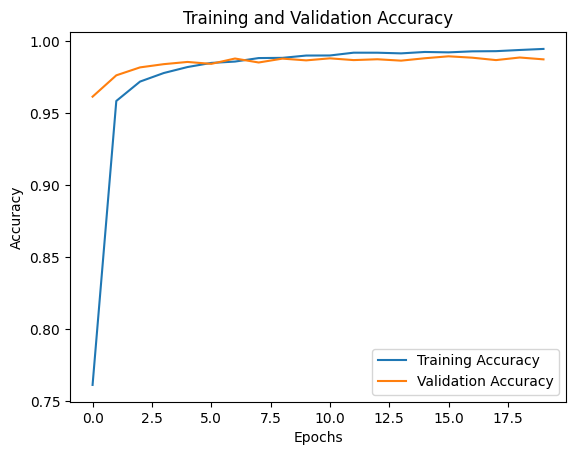

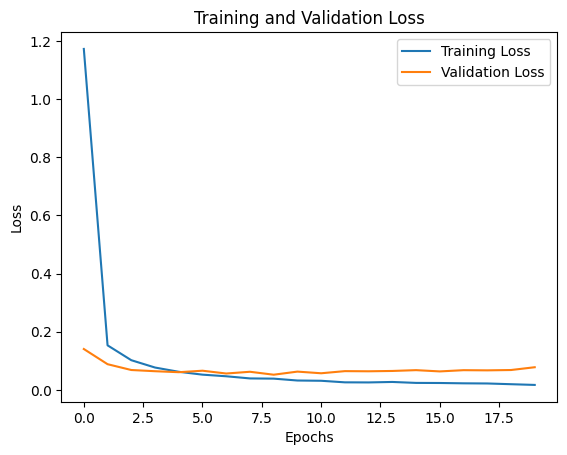

In [20]:
# Plot model accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

# Print the accuracy
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 98.72%


In [22]:
predictions = model.predict(X_test)

488/488 [==============================] - 1s 2ms/step


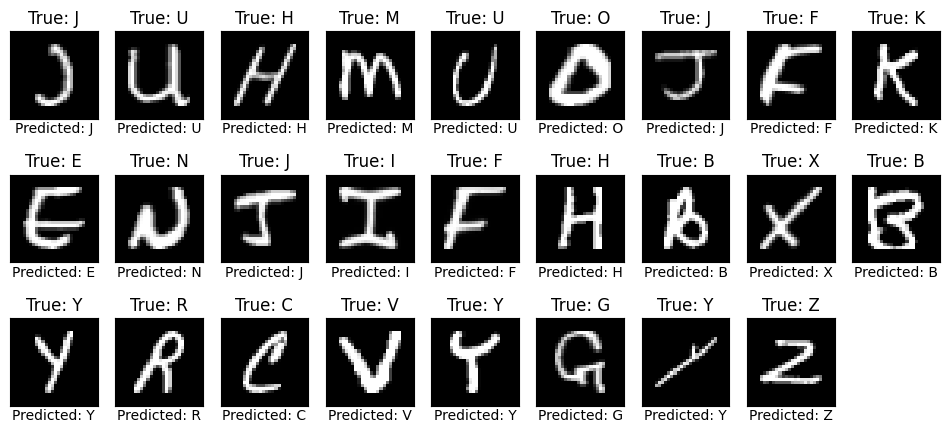

In [31]:
# Show predictions from the models
plt.figure(figsize=(12,9))
for i in range(26):
    rand_index = random.randint(0, len(X_test) - 1)
    plt.subplot(5,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[rand_index].reshape(28,28), cmap='gray')
    true_label = alphabets[np.argmax(Y_test[rand_index])]
    predicted_label = alphabets[np.argmax(predictions[rand_index])]
    plt.title(f"True: {true_label}")
    plt.text(0.5, -0.15, f"Predicted: {predicted_label}", ha='center', transform=plt.gca().transAxes)
plt.show()

In [24]:
model.save("handwriting_model.h5")